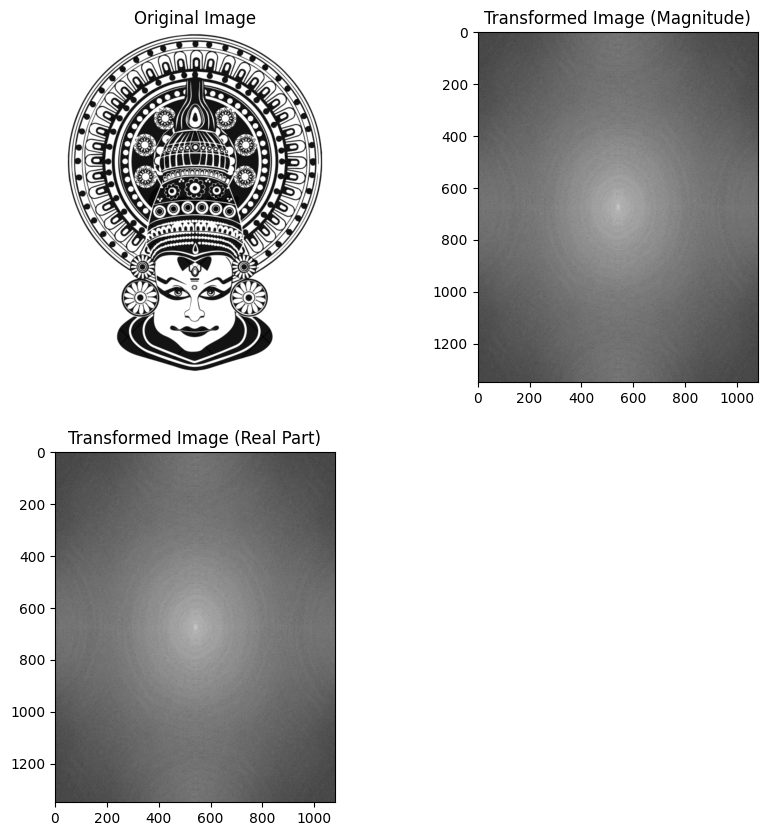

Original Energy:  89089375 
Transformed Energy:  9.170590764929397e+16 
Energy Loss: -9.170590756020459e+16

Energy before and after the transformation are different.
Therefore the energy is not conserved.


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform(image):
    f_trnsfrm = np.fft.fft2(image)
    f_trnsfrm_shifted = np.fft.fftshift(f_trnsfrm)
    magnitude = np.abs(f_trnsfrm_shifted)
    energy = Energy_calculator(magnitude)
    return f_trnsfrm_shifted, magnitude, energy

def Energy_calculator(image):
    energy = np.sum(image**2)
    return energy

image = cv2.imread(r"C:\Users\Akshay\Downloads\kathakali.png", cv2.IMREAD_GRAYSCALE)
original_energy = Energy_calculator(image)
transformed_image, magnitude, transformed_energy = fourier_transform(image)

plt.figure(figsize=(10, 10))
#orginal image
plt.subplot(221)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

#transformed image magnitude
plt.subplot(222)
plt.imshow(np.log(1 + magnitude), cmap="gray")
plt.title("Transformed Image (Magnitude)")

plt.subplot(223)
plt.imshow(np.log(1 + np.abs(transformed_image)), cmap="gray")
plt.title("Transformed Image (Real Part)")
plt.show()

energy_loss = original_energy - transformed_energy

print("Original Energy: ",original_energy,"\nTransformed Energy: ",transformed_energy,"\nEnergy Loss:", energy_loss)

relative_energy_difference = (
    np.abs(energy_loss) / original_energy
    )
tolerance_percentage = 0.1

print("")
if relative_energy_difference < tolerance_percentage:
    print("Energy before and after transformation are similar.\nEnergy is conserved.")
    
else:
    print("Energy before and after the transformation are different.\nTherefore the energy is not conserved.")
    